In [1]:
import pandas as pd
import xgboost as xgb
import time
import numpy as np

In [2]:
fly = pd.read_csv('Aviation_accident.encoded.csv', index_col='Unnamed: 0')

In [3]:
fly

,Event.Date,Injury.Severity_Fatal,Injury.Severity_Incident,Injury.Severity_Minor,Injury.Severity_Non-Fatal,Injury.Severity_Serious,Injury.Severity_Unavailable,Aircraft.damage_Destroyed,Aircraft.damage_Minor,Aircraft.damage_Substantial,...,Broad.phase.of.flight_Cruise,Broad.phase.of.flight_Descent,Broad.phase.of.flight_Go-around,Broad.phase.of.flight_Landing,Broad.phase.of.flight_Maneuvering,Broad.phase.of.flight_Other,Broad.phase.of.flight_Standing,Broad.phase.of.flight_Takeoff,Broad.phase.of.flight_Taxi,Broad.phase.of.flight_unknown
0,1948-10-24,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1962-07-19,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1974-08-30,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1977-06-19,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1979-08-02,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84171,2022-12-13,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84172,2022-12-14,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84173,2022-12-15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
84174,2022-12-16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
y = fly['Injury.Severity_Fatal']
x = fly.drop(['Event.Date', 'Injury.Severity_Fatal', 'Injury.Severity_Incident',
       'Injury.Severity_Minor', 'Injury.Severity_Non-Fatal',
       'Injury.Severity_Serious', 'Injury.Severity_Unavailable'], axis =1)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
xg_reg = xg_reg = xgb.XGBRegressor(random_state=123, n_estimators=5, max_depth=7)

In [7]:
xg_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [8]:
xg_reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=5, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [9]:
y_pred = xg_reg.predict(x_test)

In [10]:
y_pred

array([0.08423436, 0.08455475, 0.08455475, ..., 0.08423436, 0.91586745,
       0.08423436], dtype=float32)

In [11]:
import sklearn.metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
def report_metrics(y_test, y_pred):
    metrics_dict = {}
    for metric in [mean_absolute_error, mean_squared_error, r2_score]:
        metrics_dict[metric.__name__] = metric(y_true=y_test, y_pred=y_pred)
    return metrics_dict

In [13]:
report_metrics(y_test=y_test, y_pred=y_pred)

{'mean_absolute_error': 0.0847214429408496,
 'mean_squared_error': 0.007450283605861055,
 'r2_score': 0.9534543855124102}

In [14]:
np.mean((y_pred - y_test)**2)

0.007450283605861055

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

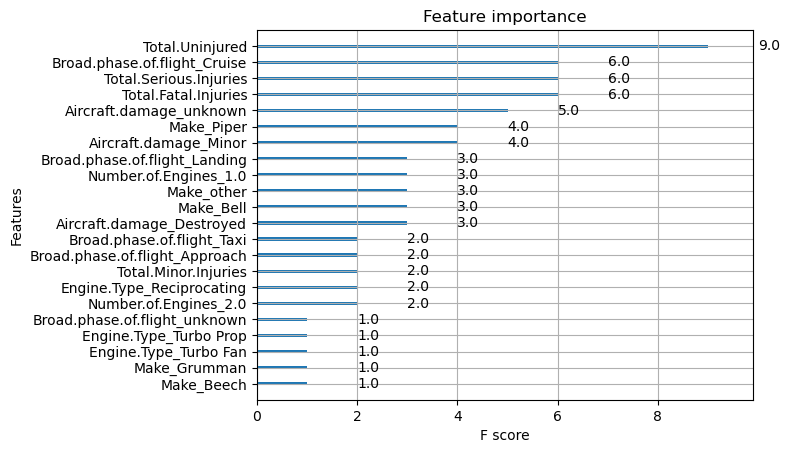

In [16]:
xgb.plot_importance(xg_reg)

In [17]:
xg_reg_gblinear = xgb.XGBRegressor(booster="gblinear")

In [18]:
xg_reg_gblinear.fit(x_train, y_train)
y_pred_2 = xg_reg_gblinear.predict(x_test)

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(fly["Injury.Severity_Fatal"])
x = fly.drop(['Event.Date', 'Injury.Severity_Fatal', 'Injury.Severity_Incident',
       'Injury.Severity_Minor', 'Injury.Severity_Non-Fatal',
       'Injury.Severity_Serious', 'Injury.Severity_Unavailable'], axis=1)

In [20]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [21]:
from collections import Counter

In [22]:
Counter(y)

Counter({1: 16385, 0: 67791})

In [23]:
sum(y)/len(y)

0.19465168218969778

In [24]:
data_dm = xgb.DMatrix(data=x.values, label =y)

In [25]:
data_dm

In [26]:
params = {
    "objective": "reg:logistic",
    "max_depth": 3,
    "booster": "gbtree",
    "learning_rate": 0.8,  # DEFAULT: 0.3
}

cv_results = xgb.cv(
    dtrain=data_dm,
    params=params,
    nfold=4,
    num_boost_round=250,
    metrics=["error", "auc"],
    as_pandas=True,
)  # metrics="auc"


cv_results

,train-error-mean,train-error-std,train-auc-mean,train-auc-std,test-error-mean,test-error-std,test-auc-mean,test-auc-std
0,0.000428,0.000025,0.999247,0.000030,0.000428,0.000075,0.999238,0.000174
1,0.000428,0.000025,0.999306,0.000045,0.000428,0.000075,0.999304,0.000135
2,0.000428,0.000025,0.999318,0.000042,0.000428,0.000075,0.999304,0.000135
3,0.000428,0.000025,0.999323,0.000049,0.000428,0.000075,0.999304,0.000135
4,0.000428,0.000025,0.999730,0.000196,0.000428,0.000075,0.999674,0.000312
...,...,...,...,...,...,...,...,...
245,0.000257,0.000007,0.999985,0.000003,0.000392,0.000062,0.999836,0.000064
246,0.000257,0.000007,0.999986,0.000003,0.000404,0.000053,0.999836,0.000064
247,0.000257,0.000007,0.999986,0.000003,0.000404,0.000053,0.999835,0.000065
248,0.000257,0.000007,0.999986,0.000003,0.000404,0.000053,0.999837,0.000065


In [27]:
cv_results.columns

Index(['train-error-mean', 'train-error-std', 'train-auc-mean',
       'train-auc-std', 'test-error-mean', 'test-error-std', 'test-auc-mean',
       'test-auc-std'],
      dtype='object')

Text(0, 0.5, 'Wartość funkcji błędu')

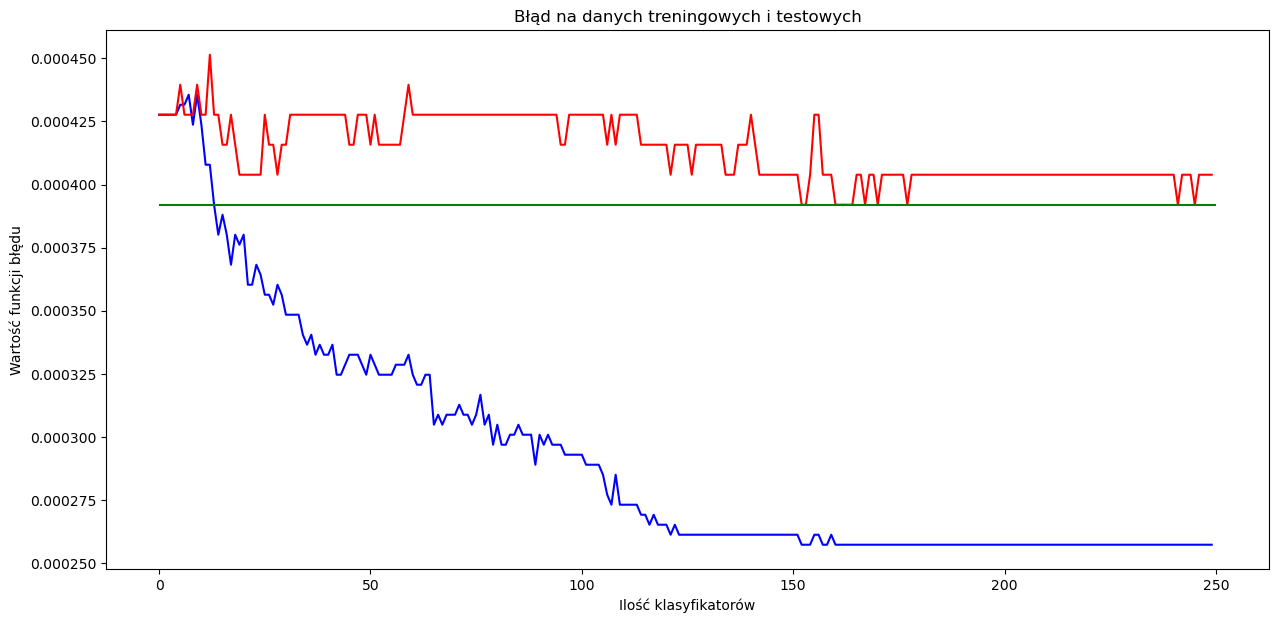

In [28]:
plt.figure(figsize=(15, 7))
plt.title("Błąd na danych treningowych i testowych")
plt.plot(cv_results["train-error-mean"], color="b")
plt.plot(cv_results["test-error-mean"], color="r")
# plt.ylim((0., 0.2))
plt.hlines([cv_results["test-error-mean"].min()], xmin=0, xmax=250, color="g")
plt.xlabel("Ilość klasyfikatorów")
plt.ylabel("Wartość funkcji błędu")

Text(0, 0.5, 'Wartość auc')

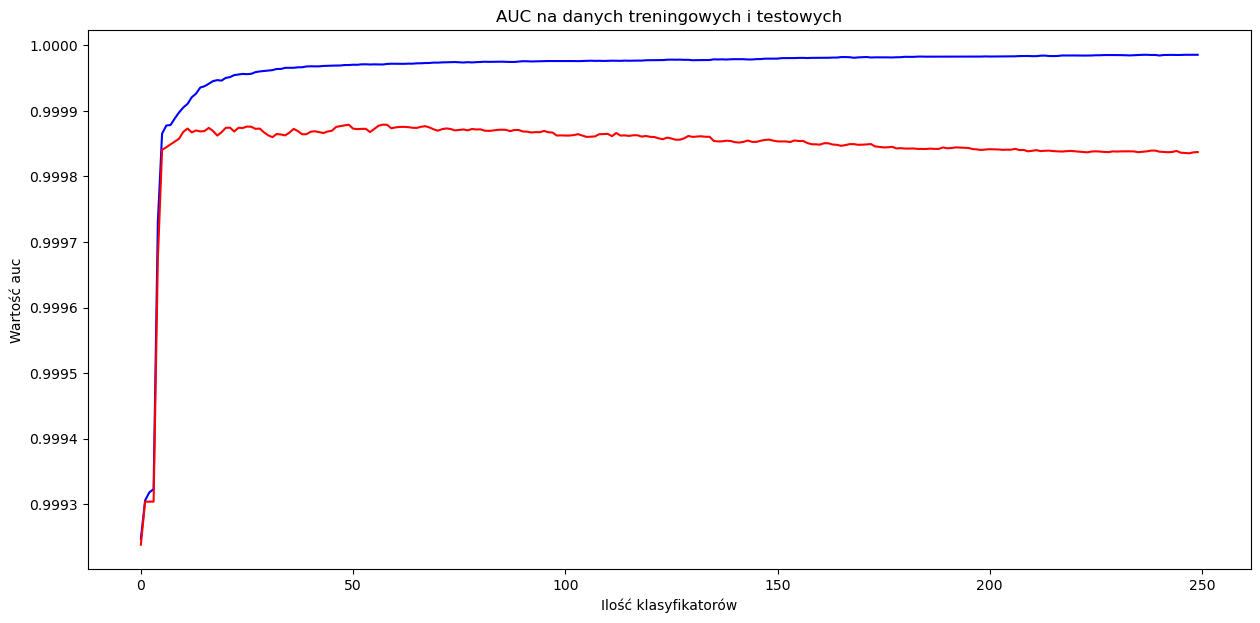

In [29]:
plt.figure(figsize=(15, 7))
plt.title("AUC na danych treningowych i testowych")
plt.plot(cv_results["train-auc-mean"], color="b")
plt.plot(cv_results["test-auc-mean"], color="r")
# plt.ylim((0., 0.2))
plt.xlabel("Ilość klasyfikatorów")
plt.ylabel("Wartość auc")

In [30]:
import sklearn.model_selection as msel

# .score() - accuracy

clf = xgb.XGBClassifier(
    objective="reg:logistic", max_depth=3, learning_rate=0.8, n_estimators=5
)
msel.cross_val_score(clf, x, y, cv=4, n_jobs=-1)

array([0.99961984, 0.99980992, 0.99966736, 0.99919217])

In [31]:
print("cv_Results: ", cv_results.iloc[-1])

cv_Results:  train-error-mean    0.000257
train-error-std     0.000007
train-auc-mean      0.999986
train-auc-std       0.000003
test-error-mean     0.000404
test-error-std      0.000053
test-auc-mean       0.999837
test-auc-std        0.000064
Name: 249, dtype: float64


In [32]:
print("acc: ", ((1 - cv_results["test-error-mean"]).iloc[-1]))

acc:  0.9995960843946018


In [33]:
from hyperopt import hp
from hyperopt import fmin, tpe
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [34]:
GLOBAL_PARAMS = {
    "objective": "reg:logistic",
    "booster": "gbtree",
}

space = {
    "max_depth": hp.choice("max_depth", [2, 3, 4, 5, 7, 8, 10, 15]),
    "learning_rate": hp.uniform("learning_rate", 0.3, 0.8)
}
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=23
)
data_dm = xgb.DMatrix(data=x_train.values, label=y_train)

In [35]:
def objective(space):
    params = GLOBAL_PARAMS.copy()
    params.update(space)
    cv_results = xgb.cv(
            dtrain=data_dm,
            params=params,
            nfold=4,
            num_boost_round=50,
            metrics=["error", "auc"],
            as_pandas=True,
    )
    return - cv_results.iloc[-1]["test-auc-mean"]


best = fmin(objective, space, algo=tpe.suggest, max_evals=10)

100%|██████████| 10/10 [00:40<00:00,  4.09s/trial, best loss: -0.9998538431823961]


In [36]:
best

{'learning_rate': 0.3461384215781855, 'max_depth': 6}

In [37]:
PARAMS = GLOBAL_PARAMS.copy()
PARAMS.update(best)

data_test = xgb.DMatrix(data=x_test.values, label=y_test)
booster = xgb.train(
    dtrain=data_dm,
    params=PARAMS,
    num_boost_round=50
)

In [38]:
y_pred = booster.predict(data=data_test)

print(f"auc on test: {roc_auc_score(y_test, y_pred)}")

auc on test: 0.9999259864574477


In [39]:
PARAMS

{'objective': 'reg:logistic',
 'booster': 'gbtree',
 'learning_rate': 0.3461384215781855,
 'max_depth': 6}

In [42]:
import joblib
joblib.dump(y_pred, 'model.pkl')

['model.pkl']